## MEMBUAT SISTEM REKOMENDASI FILM MENGGUNAKAN ALGORITMA MACHINE LEARNING

### Nama : Huffaz Muhammad Abdurrofi Baith

### Import Modul

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np
import json
import warnings
warnings.filterwarnings('ignore')
import base64
import io
from matplotlib.pyplot import imread
import codecs
from IPython.display import HTML

### Memuat dataset

In [2]:
movies = pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_movies.csv')
credits = pd.read_csv('/kaggle/input/tmdb-movie-metadata/tmdb_5000_credits.csv')

In [3]:
# Menampilkan dataset1
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
# Menampilkan dataset2
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### Exploratory Data Analysis

In [5]:
# mengubah kolom genre dari json menjadi string
movies['genres'] = movies['genres'].apply(json.loads)
for index,i in zip(movies.index,movies['genres']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name'])) # the key 'name' contains the name of the genre
    movies.loc[index,'genres'] = str(list1)

In [6]:
# # mengubah kolom keywords dari json menjadi string
movies['keywords'] = movies['keywords'].apply(json.loads)
for index,i in zip(movies.index,movies['keywords']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'keywords'] = str(list1)

In [7]:
# mengubah kolom production_companis dari json menjadi string
movies['production_companies'] = movies['production_companies'].apply(json.loads)
for index,i in zip(movies.index,movies['production_companies']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    movies.loc[index,'production_companies'] = str(list1)

In [8]:
# mengubah kolom cast dari json menjadi string
credits['cast'] = credits['cast'].apply(json.loads)
for index,i in zip(credits.index,credits['cast']):
    list1 = []
    for j in range(len(i)):
        list1.append((i[j]['name']))
    credits.loc[index,'cast'] = str(list1)

In [9]:
# mengubah kolom crew dari json menjadi string
credits['crew'] = credits['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
credits['crew'] = credits['crew'].apply(director)
credits.rename(columns={'crew':'director'},inplace=True)

In [10]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [11]:
movies.iloc[6]

budget                                                          260000000
genres                                            ['Animation', 'Family']
homepage                     http://disney.go.com/disneypictures/tangled/
id                                                                  38757
keywords                ['hostage', 'magic', 'horse', 'fairy tale', 'm...
original_language                                                      en
original_title                                                    Tangled
overview                When the kingdom's most wanted-and most charmi...
popularity                                                      48.681969
production_companies    ['Walt Disney Pictures', 'Walt Disney Animatio...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2010-11-24
revenue                                                         591794936
runtime                               

In [12]:
# menggabungkan 2 dataset credits dan movie_id
movies = movies.merge(credits,left_on='id',right_on='movie_id',how='left')
movies = movies[['id','original_title','genres','cast','vote_average','director','keywords']]

In [13]:
movies.iloc[25]

id                                                              597
original_title                                              Titanic
genres                             ['Drama', 'Romance', 'Thriller']
cast              ['Kate Winslet', 'Leonardo DiCaprio', 'Frances...
vote_average                                                    7.5
director                                              James Cameron
keywords          ['shipwreck', 'iceberg', 'ship', 'panic', 'tit...
Name: 25, dtype: object

In [14]:
movies.shape

(4803, 7)

In [15]:
movies.size

33621

In [16]:
movies.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4793, 4794, 4795, 4796, 4797, 4798, 4799, 4800, 4801, 4802],
           dtype='int64', length=4803)

In [17]:
movies.columns

Index(['id', 'original_title', 'genres', 'cast', 'vote_average', 'director',
       'keywords'],
      dtype='object')

In [18]:
movies.dtypes

id                  int64
original_title     object
genres             object
cast               object
vote_average      float64
director           object
keywords           object
dtype: object

### Visualisasi Data Kolom Genre

In [19]:
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')

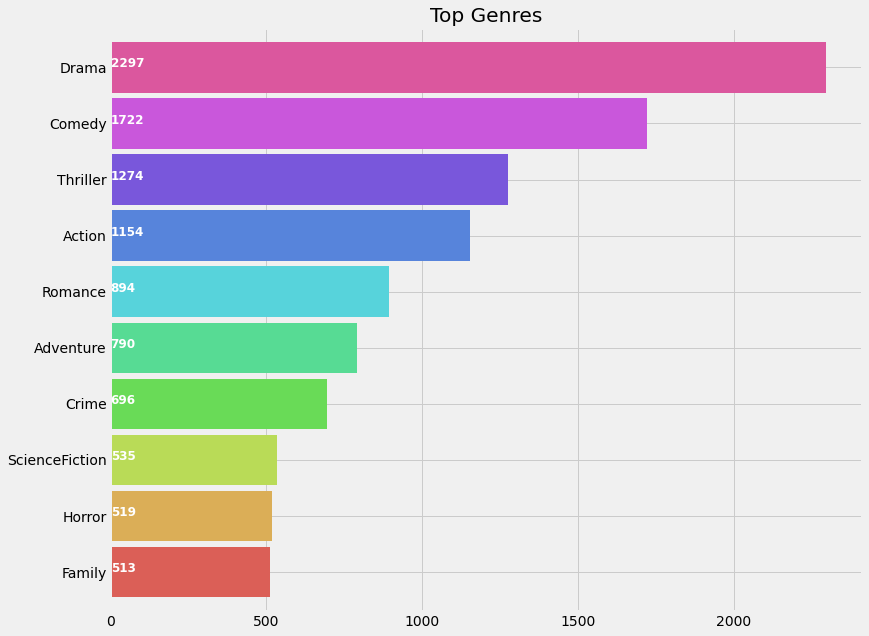

In [20]:
plt.subplots(figsize=(12,10))
list1 = []
for i in movies['genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.savefig('genres.jpg',bbox_inches='tight')
plt.show()

In [21]:
for i,j in zip(movies['genres'],movies.index):
    list2=[]
    list2=i
    list2.sort()
    movies.loc[j,'genres']=str(list2)
movies['genres'] = movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres'] = movies['genres'].str.split(',')

In [22]:
genreList = []
for index, row in movies.iterrows():
    genres = row["genres"]
    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)
genreList

['Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'Crime',
 'Drama',
 'Thriller',
 'Animation',
 'Family',
 'Western',
 'Comedy',
 'Romance',
 'Horror',
 'Mystery',
 'History',
 'War',
 'Music',
 'Documentary',
 'Foreign',
 'TVMovie',
 '']

In [23]:
def binary(genre_list):
    binaryList = []
    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [24]:
movies['genres_bin'] = movies['genres'].apply(lambda x: binary(x))
movies['genres_bin'].head()

0    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: genres_bin, dtype: object

### Visualisasi data kolom actor

In [25]:
movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['cast'] = movies['cast'].str.split(',')

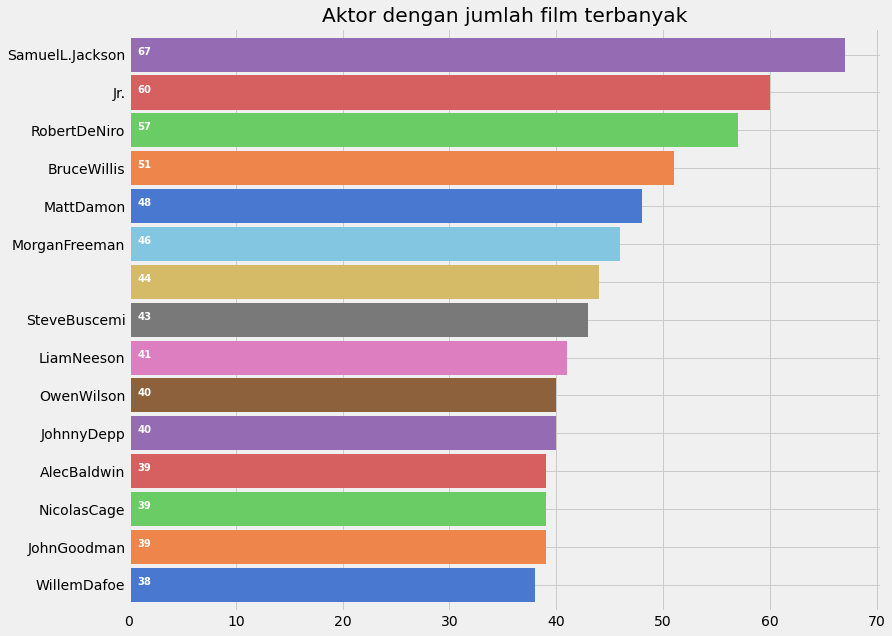

In [26]:
plt.subplots(figsize=(12,10))
list1=[]
for i in movies['cast']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
plt.title('Aktor dengan jumlah film terbanyak')
plt.show()

In [27]:
for i,j in zip(movies['cast'],movies.index):
    list2 = []
    list2 = i[:4]
    movies.loc[j,'cast'] = str(list2)
movies['cast'] = movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['cast'] = movies['cast'].str.split(',')
for i,j in zip(movies['cast'],movies.index):
    list2 = []
    list2 = i
    list2.sort()
    movies.loc[j,'cast'] = str(list2)
movies['cast']=movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')

In [28]:
castList = []
for index, row in movies.iterrows():
    cast = row["cast"]
    for i in cast:
        if i not in castList:
            castList.append(i)

In [29]:
len(castList)

126

In [30]:
def binary(cast_list):
    binaryList = []
    for genre in castList:
        if genre in cast_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [31]:
movies['cast_bin'] = movies['cast'].apply(lambda x: binary(x))
movies['cast_bin'].head()

0    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
1    [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...
2    [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
3    [0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...
4    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...
Name: cast_bin, dtype: object

### Visualisasi data kolom director

In [32]:
def xstr(s):
    if s is None:
        return ''
    return str(s)
movies['director'] = movies['director'].apply(xstr)

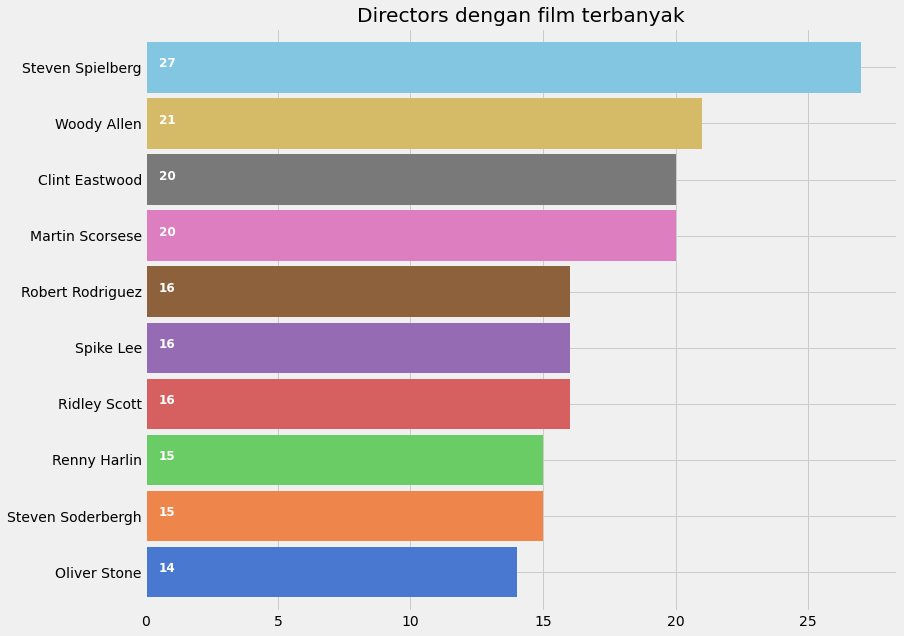

In [33]:
plt.subplots(figsize=(12,10))
ax = movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.5, i, v,fontsize=12,color='white',weight='bold')
plt.title('Directors dengan film terbanyak')
plt.savefig('director.jpg',bbox_inches='tight')
plt.show()

In [34]:
directorList=[]
for i in movies['director']:
    if i not in directorList:
        directorList.append(i)

In [35]:
len(directorList)

2350

In [36]:
def binary(director_list):
    binaryList = []  
    for direct in directorList:
        if direct in director_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [37]:
movies['director_bin'] = movies['director'].apply(lambda x: binary(x))
movies['director_bin'].head()

0    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: director_bin, dtype: object

In [38]:
movies

,id,original_title,genres,cast,vote_average,director,keywords,genres_bin,cast_bin,director_bin
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","SamWorthington,SigourneyWeaver,StephenLang,Zoe...",7.2,James Cameron,"['culture clash', 'future', 'space war', 'spac...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,285,Pirates of the Caribbean: At World's End,"[Action, Adventure, Fantasy]","JohnnyDepp,KeiraKnightley,OrlandoBloom,Stellan...",6.9,Gore Verbinski,"['ocean', 'drug abuse', 'exotic island', 'east...","[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,206647,Spectre,"[Action, Adventure, Crime]","ChristophWaltz,DanielCraig,LéaSeydoux,RalphFie...",6.3,Sam Mendes,"['spy', 'based on novel', 'secret agent', 'seq...","[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,49026,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]","AnneHathaway,ChristianBale,GaryOldman,MichaelC...",7.6,Christopher Nolan,"['dc comics', 'crime fighter', 'terrorist', 's...","[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,49529,John Carter,"[Action, Adventure, ScienceFiction]","LynnCollins,SamanthaMorton,TaylorKitsch,Willem...",6.1,Andrew Stanton,"['based on novel', 'mars', 'medallion', 'space...","[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,"[Action, Crime, Thriller]","CarlosGallardo,JaimedeHoyos,PeterMarquardt,Rei...",6.6,Robert Rodriguez,"['united states–mexico barrier', 'legs', 'arms...","[1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4799,72766,Newlyweds,"[Comedy, Romance]","CaitlinFitzgerald,EdwardBurns,KerryBishé,Marsh...",5.9,Edward Burns,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...","[0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4800,231617,"Signed, Sealed, Delivered","[Comedy, Drama, Romance, TVMovie]","CrystalLowe,EricMabius,GeoffGustafson,KristinB...",7.0,Scott Smith,"['date', 'love at first sight', 'narration', '...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, ...","[0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4801,126186,Shanghai Calling,[],"AlanRuck,BillPaxton,DanielHenney,ElizaCoupe",5.7,Daniel Hsia,[],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [39]:
words_list = []
for index, row in movies.iterrows():
    genres = row["keywords"]
    for genre in genres:
        if genre not in words_list:
            words_list.append(genre)

In [40]:
len(words_list)

79

In [41]:
def binary(words):
    binaryList = []
    for genre in words_list:
        if genre in words:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [42]:
movies['words_bin'] = movies['keywords'].apply(lambda x: binary(x))
movies = movies[(movies['vote_average']!=0)] #removing the movies with 0 score and without drector names 
movies = movies[movies['director']!='']

### Mencari jarak setiap film untuk KNN algorithm

In [43]:
import numpy as np
def cityblock_distance(A, B):
    result = np.sum([abs(a - b) for (a, b) in zip(A, B)])
    return result

In [44]:
from scipy import spatial
def Similarity_Cosine(movieId1, movieId2):
    a = movies.iloc[movieId1]
    b = movies.iloc[movieId2]
    
    genresA = a['genres_bin']
    genresB = b['genres_bin']
    
    genreDistance = spatial.distance.cosine(genresA, genresB)
    
    scoreA = a['cast_bin']
    scoreB = b['cast_bin']
    scoreDistance = spatial.distance.cosine(scoreA, scoreB)
    
    directA = a['director_bin']
    directB = b['director_bin']
    directDistance = spatial.distance.cosine(directA, directB)
    
    wordsA = a['words_bin']
    wordsB = b['words_bin']
    wordsDistance = spatial.distance.cosine(wordsA,wordsB)
    return genreDistance + directDistance + scoreDistance + wordsDistance

In [45]:
from scipy.spatial.distance import cdist
def Similarity_Manhattan(movieId1, movieId2):
    a = movies.iloc[movieId1]
    b = movies.iloc[movieId2]
    
    genresA = a['genres_bin']
    genresB = b['genres_bin']
    
    genreDistance = cityblock_distance(genresA, genresB)
    
    scoreA = a['cast_bin']
    scoreB = b['cast_bin']
    scoreDistance = cityblock_distance(scoreA, scoreB)
    
    directA = a['director_bin']
    directB = b['director_bin']
    directDistance = cityblock_distance(directA, directB)
    
    wordsA = a['words_bin']
    wordsB = b['words_bin']
    wordsDistance = cityblock_distance(wordsA,wordsB)
    return genreDistance + directDistance + scoreDistance + wordsDistance

In [46]:
from scipy.spatial.distance import euclidean
def Similarity_Euclidean(movieId1, movieId2):
    a = movies.iloc[movieId1]
    b = movies.iloc[movieId2]
    
    genresA = a['genres_bin']
    genresB = b['genres_bin']
    
    genreDistance = euclidean(genresA, genresB)

    scoreA = a['cast_bin']
    scoreB = b['cast_bin']
    scoreDistance = euclidean(scoreA, scoreB)
    
    directA = a['director_bin']
    directB = b['director_bin']
    directDistance = euclidean(directA, directB)
    
    wordsA = a['words_bin']
    wordsB = b['words_bin']
    wordsDistance = euclidean(wordsA,wordsB)
    return genreDistance + directDistance + scoreDistance + wordsDistance

In [47]:
from scipy.spatial import distance
def Similarity_Hamming(movieId1, movieId2):
    a = movies.iloc[movieId1]
    b = movies.iloc[movieId2]
    
    genresA = a['genres_bin']
    genresB = b['genres_bin']
    
    genreDistance = distance.hamming(genresA, genresB)

    scoreA = a['cast_bin']
    scoreB = b['cast_bin']
    scoreDistance = distance.hamming(scoreA, scoreB)
    
    directA = a['director_bin']
    directB = b['director_bin']
    directDistance = distance.hamming(directA, directB)
    
    wordsA = a['words_bin']
    wordsB = b['words_bin']
    wordsDistance = distance.hamming(wordsA,wordsB)
    return genreDistance + directDistance + scoreDistance + wordsDistance

In [48]:
print(movies.iloc[3])
print(movies.iloc[160])

id                                                            49026
original_title                                The Dark Knight Rises
genres                             [Action, Crime, Drama, Thriller]
cast              AnneHathaway,ChristianBale,GaryOldman,MichaelC...
vote_average                                                    7.6
director                                          Christopher Nolan
keywords          ['dc comics', 'crime fighter', 'terrorist', 's...
genres_bin        [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
cast_bin          [0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...
director_bin      [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
words_bin         [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
Name: 3, dtype: object
id                                                            82702
original_title                           How to Train Your Dragon 2
genres            [Action, Adventure, Animation, Comedy, Family,...
cast                 Gera

In [50]:
Similarity_Euclidean(90,10)

9.73668665136369

In [51]:
Similarity_Cosine(90,10)

1.4317505131109727

In [52]:
Similarity_Hamming(90,10)

0.3863242404422043

In [53]:
Similarity_Manhattan(90,10)

27

In [54]:
new_id = list(range(0,movies.shape[0]))
movies['new_id']=new_id
movies=movies[['original_title','genres','vote_average','genres_bin','cast_bin','new_id','director','director_bin','words_bin',]]
movies.head()

,original_title,genres,vote_average,genres_bin,cast_bin,new_id,director,director_bin,words_bin
0,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]",7.2,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0,James Cameron,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,Pirates of the Caribbean: At World's End,"[Action, Adventure, Fantasy]",6.9,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, ...",1,Gore Verbinski,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,Spectre,"[Action, Adventure, Crime]",6.3,"[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2,Sam Mendes,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ..."
3,The Dark Knight Rises,"[Action, Crime, Drama, Thriller]",7.6,"[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...",3,Christopher Nolan,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,John Carter,"[Action, Adventure, ScienceFiction]",6.1,"[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, ...",4,Andrew Stanton,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ..."


In [55]:
len(movies['vote_average'])

4723

In [56]:
movies['vote_average'][3682]

5.5

### Membuat prediksi rating dan rekomendasi film dengan algoritma KNN

In [57]:
import operator
def predict_score(iloc,Similarity):
    name = movies['original_title'][iloc]
    new_movie = movies[movies['original_title'].str.contains(name)].iloc[0].to_frame().T
    def getNeighbors(baseMovie, K):
        distances = []
        for index, movie in movies.iterrows():
            if movie['new_id'] != baseMovie['new_id'].values[0]:
                dist = Similarity(baseMovie['new_id'].values[0], movie['new_id'])
                distances.append((movie['new_id'], dist))
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
        for x in range(K):
            neighbors.append(distances[x])
        return neighbors
    K = 10
    avgRating = 0
    neighbors = getNeighbors(new_movie, K)
    for neighbor in neighbors:
        avgRating = avgRating+movies.iloc[neighbor[0]][2]  
    avgRating = avgRating/K
    return avgRating, new_movie['vote_average']

In [132]:
list_test = np.random.random_integers(0,len(movies['original_title']),500)

In [133]:
test = []
for i in list_test:
    test.append(i)

In [135]:
test.remove(4314)

In [137]:
test.remove(4123)

In [139]:
test.remove(4721)

In [141]:
test.remove(4550)

In [149]:
test.remove(4553)

In [151]:
test.remove(4708)

In [153]:
test.remove(4566)

In [154]:
for i in range(0,len(test)):
    print(movies['original_title'][test[i]])

Beloved
Duplex
The Sleepwalker
Foodfight!
Not Cool
The Wiz
Phantasm II
I Think I Love My Wife
Puss in Boots
Miss Potter
Red Dragon
Ride Along
Flash of Genius
The Day After Tomorrow
Dogma
My Blueberry Nights
Trash
The Last of the Mohicans
Son of God
キャプテンハーロック
Taking Woodstock
Repo! The Genetic Opera
The Whole Nine Yards
Drop Dead Gorgeous
Police Academy
Sunshine Cleaning
Eternal Sunshine of the Spotless Mind
She Done Him Wrong
Morvern Callar
The Tourist
The Return of the Pink Panther
An Education
Deadline - U.S.A.
The Nun's Story
The House of the Devil
Alien³
Click
Deep Impact
Hachi: A Dog's Tale
5 Days of War
A Nightmare on Elm Street 5: The Dream Child
The Imaginarium of Doctor Parnassus
American Psycho
해운대
Big Momma's House
Ali
Max Payne
Super 8
Get on Up
The Last Sin Eater
Clueless
Go
Little Children
True Lies
Torn Curtain
The Christmas Candle
Men in Black 3
Hostel: Part II
She's the One
My Week with Marilyn
Casper
Arthur Christmas
The Matrix Revolutions
Raise Your Voice
Survivor
T

In [159]:
real_rating = np.zeros(len(test))
pred_cos = np.zeros(len(test))
pred_euc = np.zeros(len(test))
pred_man = np.zeros(len(test))
for i in range(0,len(test)):
    pred_cos[i], real_rating[i] = predict_score(test[i],Similarity_Cosine)

In [161]:
pred_ham = np.zeros(len(test))
for i in range(0,len(test)):
    pred_ham[i], real_rating[i] = predict_score(test[i],Similarity_Hamming)
    pred_euc[i], real_rating[i] = predict_score(test[i],Similarity_Euclidean)
    pred_man[i], real_rating[i] = predict_score(test[i],Similarity_Manhattan)

In [162]:
print(pred_man)

[5.9  5.21 6.49 6.12 5.95 6.63 6.05 5.32 6.23 6.72 5.98 5.99 6.06 6.58
 6.11 6.88 5.88 6.59 6.01 5.19 6.27 5.36 5.86 6.37 6.2  6.23 6.54 6.22
 6.68 6.09 6.31 7.21 5.33 6.53 6.23 6.46 6.32 6.72 6.83 6.89 6.63 6.38
 6.62 6.35 6.27 6.44 5.   6.06 6.26 6.2  6.48 6.61 6.77 6.13 5.95 6.24
 6.34 5.46 6.34 6.54 6.03 6.44 6.5  6.91 6.47 5.97 6.36 5.89 6.05 6.3
 5.88 5.59 6.04 6.09 6.28 7.09 6.79 6.24 6.16 6.39 6.51 5.24 5.54 6.37
 5.59 5.35 6.41 5.86 5.53 6.33 6.32 6.89 6.06 5.82 5.67 6.27 5.97 6.34
 6.3  6.07 6.85 6.61 6.67 6.08 5.81 6.86 6.29 5.73 6.41 6.94 5.69 6.13
 7.01 6.62 6.82 6.38 5.9  7.11 6.53 6.34 5.64 6.35 6.19 6.82 5.07 6.37
 6.73 6.18 6.46 5.14 6.27 5.63 5.75 6.57 6.22 5.82 6.84 5.73 5.76 6.08
 6.23 6.56 5.92 6.21 5.17 6.17 6.91 6.72 6.92 6.85 6.17 6.03 6.03 5.4
 6.41 6.53 6.84 6.4  5.14 6.41 5.72 5.75 6.29 6.48 5.96 6.47 6.4  6.22
 6.14 6.14 6.41 6.56 6.12 6.07 6.52 6.   6.72 5.75 6.5  6.17 5.77 6.82
 6.26 5.65 5.59 6.44 6.17 6.02 6.76 5.72 6.06 5.58 6.42 5.67 6.36 5.75
 5.78 6.

In [160]:
print(pred_cos)

[5.57 5.29 6.81 6.02 6.13 6.92 5.98 5.78 6.29 6.58 5.73 5.95 6.95 6.14
 6.07 6.87 6.14 6.48 6.77 5.1  6.74 5.87 5.98 6.22 6.23 6.79 6.7  5.97
 6.99 6.29 5.9  6.94 5.68 7.05 6.17 6.35 6.38 6.85 6.79 7.04 6.16 6.44
 6.6  6.35 5.8  6.52 5.54 6.48 7.07 6.92 5.82 6.54 7.17 6.36 6.49 6.6
 5.89 6.36 6.25 6.73 5.99 6.5  6.22 6.63 6.19 5.66 6.45 5.31 6.5  6.61
 5.89 4.99 6.28 6.2  5.81 6.67 6.89 5.96 6.4  6.25 6.3  5.65 5.82 6.38
 5.88 5.91 6.98 6.09 5.18 7.08 6.6  6.52 6.66 5.76 5.68 5.73 6.68 6.44
 6.74 5.82 6.59 6.22 6.32 6.2  6.14 7.19 6.57 6.   5.74 7.01 5.28 6.36
 6.9  6.31 7.31 5.86 5.73 7.15 6.27 6.25 5.88 6.65 5.86 7.45 5.01 5.72
 7.23 6.26 6.33 5.65 6.43 6.02 5.78 6.53 6.27 5.93 6.55 6.33 5.99 5.96
 5.93 6.46 6.68 6.09 4.52 6.05 6.73 6.57 6.58 6.23 6.45 5.87 6.02 5.85
 6.67 6.55 6.56 6.12 5.77 6.68 5.28 6.13 6.15 7.08 5.03 6.49 6.4  6.25
 6.38 5.94 7.22 6.73 6.08 7.09 6.43 6.21 6.35 5.76 7.06 6.36 5.59 6.68
 6.45 5.35 5.29 6.3  6.3  6.32 5.94 5.63 6.34 4.97 5.66 5.14 6.34 5.36
 5.57 6

In [163]:
print(pred_ham)

[5.73 5.27 6.52 6.02 6.04 6.93 6.14 5.62 6.16 6.86 5.6  5.82 6.26 6.4
 6.19 7.08 5.88 6.57 6.64 5.18 6.46 5.38 5.73 6.17 5.74 6.79 6.9  5.83
 6.72 6.24 5.92 6.95 6.01 6.93 6.32 6.38 6.82 7.2  6.97 7.05 6.21 5.92
 6.67 6.47 6.06 6.29 5.75 6.34 6.4  6.7  6.28 6.51 7.01 5.93 5.88 6.62
 5.97 5.99 6.36 6.81 6.2  6.29 6.1  7.01 6.48 5.76 6.39 5.19 6.14 6.26
 5.92 4.86 6.37 5.73 5.9  6.73 6.93 5.85 6.29 6.3  6.19 5.67 5.98 6.4
 5.74 6.35 7.16 5.9  5.33 6.89 6.45 6.8  6.44 5.5  5.69 5.41 6.66 6.66
 6.91 5.5  7.37 6.31 6.4  6.28 6.28 6.91 6.71 5.54 5.91 6.93 5.29 5.93
 6.95 6.24 7.21 6.23 5.73 7.34 6.39 6.36 5.48 6.5  5.95 7.07 4.88 5.74
 6.89 5.74 6.35 5.27 6.3  5.82 5.17 6.67 6.57 5.95 6.6  6.54 5.73 6.21
 6.15 6.39 6.32 6.15 4.76 5.98 6.88 6.84 6.75 6.46 6.46 5.55 6.3  6.
 6.65 6.59 6.53 5.97 5.6  6.05 5.6  5.67 6.09 6.49 5.25 6.49 6.29 6.11
 6.51 6.46 7.26 6.39 5.96 6.06 6.32 5.99 6.57 5.28 6.98 6.26 5.32 6.83
 6.65 4.98 5.61 6.26 6.28 6.3  6.11 5.52 6.46 5.53 6.07 5.39 6.07 5.4
 5.32 6.17 

In [164]:
print(real_rating)

[5.9 5.9 4.1 2.3 3.7 5.9 6.3 5.  6.4 6.3 6.7 6.1 6.3 6.2 6.8 6.  7.1 7.1
 5.9 6.5 6.2 6.7 6.2 6.4 4.1 6.5 7.9 5.1 7.2 6.  6.7 6.8 6.9 7.4 6.  6.2
 6.  5.9 7.7 5.8 5.5 6.3 7.3 6.5 5.4 6.4 5.2 6.6 6.4 6.2 6.9 5.8 6.9 6.8
 6.4 5.8 6.2 5.6 5.7 6.6 6.  6.7 6.4 6.  7.4 5.1 6.4 4.4 6.9 6.9 6.3 2.
 7.  7.1 5.5 6.4 6.6 7.1 6.9 6.  5.9 5.9 6.6 6.2 5.1 5.4 6.6 5.9 3.4 6.7
 6.7 6.7 4.4 4.9 6.4 5.4 5.3 6.4 6.8 5.2 6.7 6.6 5.6 6.2 7.5 7.  6.5 6.8
 5.8 8.  6.4 6.8 7.3 4.2 6.8 4.8 5.8 6.2 6.9 5.7 6.1 5.2 6.9 8.  4.8 6.5
 7.6 6.8 6.6 6.2 8.1 3.8 6.8 5.6 6.2 4.2 7.  5.3 6.  6.5 7.  4.6 5.6 6.5
 5.  6.2 5.9 6.2 6.7 6.8 7.2 6.  5.  4.7 8.1 7.  6.6 6.6 7.  6.5 5.2 6.4
 5.4 6.9 7.4 7.4 4.7 4.7 6.7 5.  7.4 7.2 5.  6.8 6.1 6.3 6.3 6.  7.7 6.5
 4.9 6.5 7.  5.9 6.1 6.8 6.2 5.9 6.7 5.9 5.3 4.6 5.5 6.5 6.3 4.9 6.7 6.5
 6.8 6.1 5.7 7.9 7.1 5.7 6.3 6.9 5.5 4.1 6.5 7.1 4.8 5.2 5.8 6.5 6.7 7.1
 6.2 5.5 5.6 5.9 6.8 7.6 5.9 5.1 5.8 7.3 6.4 6.7 6.2 6.2 6.3 9.5 5.9 7.3
 5.2 6.3 7.  6.6 7.4 5.3 7.1 6.3 6.8 5.5 6.  7.  6. 

### Hitung Error

In [166]:
def error_rel(y_pred,y_real):
    err_rel = np.zeros(len(y_pred))
    for i in range(len(y_pred)):
        err_rel[i] = abs(y_pred[i]-y_real[i])/y_real[i]
    has_err = sum(err_rel)/len(y_pred) * 100
    return has_err

In [167]:
man_err = error_rel(pred_man,real_rating)
print(man_err)

12.187343452375607


In [168]:
euc_err = error_rel(pred_euc,real_rating)
print(euc_err)

11.788685650477445


In [169]:
cos_err = error_rel(pred_cos,real_rating)
print(cos_err)

11.501954531530165


In [170]:
ham_err = error_rel(pred_ham,real_rating)
print(ham_err)

11.942036941906489


### Plot Mean Relative Error

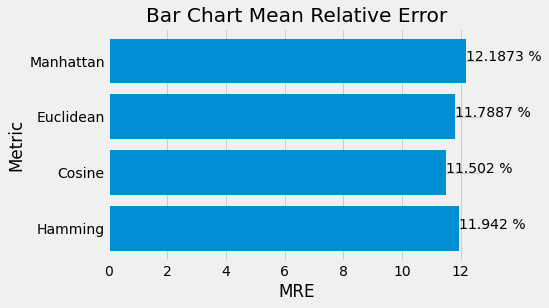

In [171]:
import matplotlib.pyplot as plt
x = ['Hamming','Cosine','Euclidean','Manhattan']
y = [round(ham_err,4),round(cos_err,4),round(euc_err,4),round(man_err,4)]
plt.barh(x, y)
for index, value in enumerate(y):
    plt.text(value, index, str('{} %'.format(value)))
plt.title('Bar Chart Mean Relative Error')
plt.ylabel('Metric')
plt.xlabel('MRE')
plt.savefig('MRE1.jpg',bbox_inches='tight')
plt.show()

### Penggunaan

In [172]:
import operator
def hasil(K,name,Similarity):
    new_movie = movies[movies['original_title'].str.contains(name)].iloc[0].to_frame().T
    print('Selected Movie: ',new_movie.original_title.values[0])
    def getNeighbors(baseMovie, K):
        distances = []
        for index, movie in movies.iterrows():
            if movie['new_id'] != baseMovie['new_id'].values[0]:
                dist = Similarity(baseMovie['new_id'].values[0], movie['new_id'])
                distances.append((movie['new_id'], dist))
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
        for x in range(K):
            neighbors.append(distances[x])
        return neighbors
    avgRating = 0
    neighbors = getNeighbors(new_movie, K)
    
    print('\nRecommended Movies: \n')
    for neighbor in neighbors:
        avgRating = avgRating+movies.iloc[neighbor[0]][2]  
        print( movies.iloc[neighbor[0]][0]+" | Genres: "+str(movies.iloc[neighbor[0]][1]).strip('[]').replace(' ','')+" | Rating: "+str(movies.iloc[neighbor[0]][2]))
    
    print('\n')
    avgRating = avgRating/K
    error = abs(avgRating-float(new_movie['vote_average']))
    print('The predicted rating for %s is: %f' %(new_movie['original_title'].values[0],avgRating))
    print('The actual rating for %s is %f' %(new_movie['original_title'].values[0],new_movie['vote_average']))

In [174]:
 hasil(10,'Hunger Games',Similarity_Manhattan)

Selected Movie:  The Hunger Games: Mockingjay - Part 2

Recommended Movies: 

The Hunger Games: Catching Fire | Genres: 'Action','Adventure','ScienceFiction' | Rating: 7.4
The Hunger Games: Mockingjay - Part 1 | Genres: 'Adventure','ScienceFiction','Thriller' | Rating: 6.6
The Hunger Games | Genres: 'Adventure','Fantasy','ScienceFiction' | Rating: 6.9
Captain America: The First Avenger | Genres: 'Action','Adventure','ScienceFiction' | Rating: 6.6
Avatar | Genres: 'Action','Adventure','Fantasy','ScienceFiction' | Rating: 7.2
The Incredible Hulk | Genres: 'Action','Adventure','ScienceFiction' | Rating: 6.1
Divergent | Genres: 'Action','Adventure','ScienceFiction' | Rating: 6.9
Jumper | Genres: 'Adventure','Fantasy','ScienceFiction' | Rating: 5.9
Hulk | Genres: 'Action','Drama','ScienceFiction' | Rating: 5.3
I, Robot | Genres: 'Action','ScienceFiction' | Rating: 6.7


The predicted rating for The Hunger Games: Mockingjay - Part 2 is: 6.560000
The actual rating for The Hunger Games: Mockin

In [175]:
 hasil(10,'Hunger Games',Similarity_Cosine)

Selected Movie:  The Hunger Games: Mockingjay - Part 2

Recommended Movies: 

The Hunger Games: Catching Fire | Genres: 'Action','Adventure','ScienceFiction' | Rating: 7.4
The Hunger Games: Mockingjay - Part 1 | Genres: 'Adventure','ScienceFiction','Thriller' | Rating: 6.6
Captain America: The First Avenger | Genres: 'Action','Adventure','ScienceFiction' | Rating: 6.6
The Incredible Hulk | Genres: 'Action','Adventure','ScienceFiction' | Rating: 6.1
Divergent | Genres: 'Action','Adventure','ScienceFiction' | Rating: 6.9
The Avengers | Genres: 'Action','Adventure','ScienceFiction' | Rating: 7.4
Captain America: The Winter Soldier | Genres: 'Action','Adventure','ScienceFiction' | Rating: 7.6
Iron Man | Genres: 'Action','Adventure','ScienceFiction' | Rating: 7.4
Independence Day | Genres: 'Action','Adventure','ScienceFiction' | Rating: 6.7
TRON: Legacy | Genres: 'Action','Adventure','ScienceFiction' | Rating: 6.3


The predicted rating for The Hunger Games: Mockingjay - Part 2 is: 6.900000

In [176]:
 hasil(9,'Hunger Games',Similarity_Euclidean)

Selected Movie:  The Hunger Games: Mockingjay - Part 2

Recommended Movies: 

The Hunger Games: Catching Fire | Genres: 'Action','Adventure','ScienceFiction' | Rating: 7.4
The Hunger Games: Mockingjay - Part 1 | Genres: 'Adventure','ScienceFiction','Thriller' | Rating: 6.6
The Hunger Games | Genres: 'Adventure','Fantasy','ScienceFiction' | Rating: 6.9
Captain America: The First Avenger | Genres: 'Action','Adventure','ScienceFiction' | Rating: 6.6
Divergent | Genres: 'Action','Adventure','ScienceFiction' | Rating: 6.9
The Incredible Hulk | Genres: 'Action','Adventure','ScienceFiction' | Rating: 6.1
Avatar | Genres: 'Action','Adventure','Fantasy','ScienceFiction' | Rating: 7.2
The Avengers | Genres: 'Action','Adventure','ScienceFiction' | Rating: 7.4
Iron Man | Genres: 'Action','Adventure','ScienceFiction' | Rating: 7.4


The predicted rating for The Hunger Games: Mockingjay - Part 2 is: 6.944444
The actual rating for The Hunger Games: Mockingjay - Part 2 is 6.600000


In [177]:
 hasil(10,'Hunger Games',Similarity_Hamming)

Selected Movie:  The Hunger Games: Mockingjay - Part 2

Recommended Movies: 

The Hunger Games: Catching Fire | Genres: 'Action','Adventure','ScienceFiction' | Rating: 7.4
Captain America: The First Avenger | Genres: 'Action','Adventure','ScienceFiction' | Rating: 6.6
Divergent | Genres: 'Action','Adventure','ScienceFiction' | Rating: 6.9
The Incredible Hulk | Genres: 'Action','Adventure','ScienceFiction' | Rating: 6.1
The Avengers | Genres: 'Action','Adventure','ScienceFiction' | Rating: 7.4
Iron Man | Genres: 'Action','Adventure','ScienceFiction' | Rating: 7.4
Captain America: The Winter Soldier | Genres: 'Action','Adventure','ScienceFiction' | Rating: 7.6
Fantastic Four | Genres: 'Action','Adventure','ScienceFiction' | Rating: 4.4
The Hunger Games | Genres: 'Adventure','Fantasy','ScienceFiction' | Rating: 6.9
Avatar | Genres: 'Action','Adventure','Fantasy','ScienceFiction' | Rating: 7.2


The predicted rating for The Hunger Games: Mockingjay - Part 2 is: 6.790000
The actual rating f